[View in Colaboratory](https://colab.research.google.com/github/fickas/mccain/blob/master/mnist_movies.ipynb)

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [2]:
#below works in local notebooks but not in colab
#goal is to turn off auto-complete of brackets.

from notebook.services.config import ConfigManager
c = ConfigManager()
c.update('notebook', {"CodeCell": {"cm_config": {"autoCloseBrackets": False}}})

{'CodeCell': {'cm_config': {'autoCloseBrackets': False}}}

In [0]:
print()43

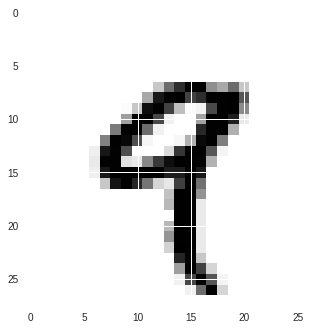

In [13]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [2]:
print(train_images.shape)

print(len(train_labels))

train_labels


(60000, 28, 28)
60000


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [0]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
60000/60000 [==============================] - 6s 101us/step - loss: 0.2603 - acc: 0.9250
Epoch 2/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.1053 - acc: 0.9686
Epoch 3/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.0686 - acc: 0.9794
Epoch 4/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.0494 - acc: 0.9851
Epoch 5/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.0375 - acc: 0.9887


In [8]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)


10000/10000 [==============================] - 1s 84us/step
test_acc: 0.9783


In [10]:
import numpy as np
x = np.array(12)
print(x)
x.ndim


12


0

# **Starting on movie reviews**

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 1s 0us/step


In [3]:
print(train_data[0])


train_labels[0]


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
#change review back to english

word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [0]:
#one hot encode a 10K vector

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:


history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 242us/step - loss: 0.5087 - acc: 0.7811 - val_loss: 0.3802 - val_acc: 0.8686
Epoch 2/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.3007 - acc: 0.9047 - val_loss: 0.3006 - val_acc: 0.8900
Epoch 3/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.2181 - acc: 0.9280 - val_loss: 0.3086 - val_acc: 0.8718
Epoch 4/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.1751 - acc: 0.9433 - val_loss: 0.2840 - val_acc: 0.8840
Epoch 5/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.1427 - acc: 0.9542 - val_loss: 0.2846 - val_acc: 0.8866
Epoch 6/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.1151 - acc: 0.9653 - val_loss: 0.3154 - val_acc: 0.8771
Epoch 7/20
15000/15000 [==============================] - 2s 146us/step - loss: 0.0981 - acc: 0.9705 - val_loss: 0.3127 - 

In [13]:
history_dict = history.history
history_dict.keys()


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [17]:
len(history_dict['acc'])

20

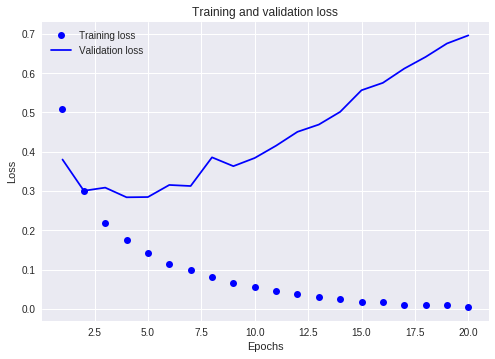

In [18]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)  #Note bug in chapter had to fix

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


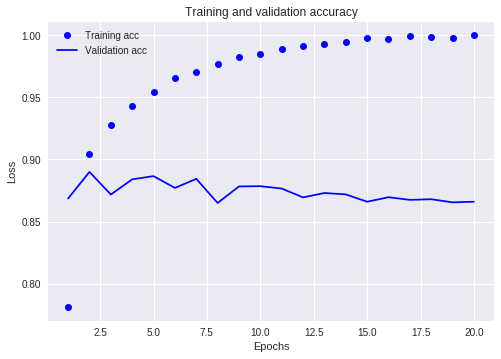

In [20]:
plt.clf()
acc_values = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [21]:
#noticing a drop off after epoch 4, build a new model and stop there

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 173us/step - loss: 0.4737 - acc: 0.8215
Epoch 2/4
25000/25000 [==============================] - 3s 107us/step - loss: 0.2672 - acc: 0.9095
Epoch 3/4
25000/25000 [==============================] - 3s 102us/step - loss: 0.2033 - acc: 0.9283
Epoch 4/4
25000/25000 [==============================] - 3s 118us/step


In [22]:
results

[0.31104919528961184, 0.87628]

In [23]:
model.predict(x_test)

array([[0.16317552],
       [0.99984825],
       [0.4054824 ],
       ...,
       [0.0819358 ],
       [0.049335  ],
       [0.46375826]], dtype=float32)

You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.

Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.

Try using the mse loss function instead of binary_crossentropy.

Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.





